In [2]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import backend as K
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
data_path = Path('./kaggle_input/')
training_path = data_path / 'training'      # 400 X-train ('train'), y-train('test') input-output pairs
evaluation_path = data_path / 'evaluation'  # 400
test_path = data_path / 'test'              # 100 pairs X-train ('train') (input-output),
                                            #           y-train (input only) pairs

training_tasks_files = sorted(os.listdir(training_path))#[1:]
eval_tasks_files = sorted(os.listdir(evaluation_path))
test_task_files = sorted(os.listdir(test_path))

In [4]:
training_tasks_files

['007bbfb7.json',
 '00d62c1b.json',
 '017c7c7b.json',
 '025d127b.json',
 '045e512c.json',
 '0520fde7.json',
 '05269061.json',
 '05f2a901.json',
 '06df4c85.json',
 '08ed6ac7.json',
 '09629e4f.json',
 '0962bcdd.json',
 '0a938d79.json',
 '0b148d64.json',
 '0ca9ddb6.json',
 '0d3d703e.json',
 '0dfd9992.json',
 '0e206a2e.json',
 '10fcaaa3.json',
 '11852cab.json',
 '1190e5a7.json',
 '137eaa0f.json',
 '150deff5.json',
 '178fcbfb.json',
 '1a07d186.json',
 '1b2d62fb.json',
 '1b60fb0c.json',
 '1bfc4729.json',
 '1c786137.json',
 '1caeab9d.json',
 '1cf80156.json',
 '1e0a9b12.json',
 '1e32b0e9.json',
 '1f0c79e5.json',
 '1f642eb9.json',
 '1f85a75f.json',
 '1f876c06.json',
 '1fad071e.json',
 '2013d3e2.json',
 '2204b7a8.json',
 '22168020.json',
 '22233c11.json',
 '2281f1f4.json',
 '228f6490.json',
 '22eb0ac0.json',
 '234bbc79.json',
 '23581191.json',
 '239be575.json',
 '23b5c85d.json',
 '253bf280.json',
 '25d487eb.json',
 '25d8a9c8.json',
 '25ff71a9.json',
 '264363fd.json',
 '272f95fa.json',
 '27a28665

In [5]:
def load_files(path):
    path_files = sorted(os.listdir(path))
    tasks = []
    for task_file in path_files:
        with open(str(path / task_file), 'r') as f:
            task = json.load(f)
            tasks.append(task)
    return tasks

In [6]:
training_tasks = load_files(training_path)
test_tasks = load_files(test_path)
evaluation_tasks = load_files(evaluation_path)

In [8]:
training_tasks[0]['test'][0]

{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]],
 'output': [[7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 7, 0, 0, 0, 0, 7, 7, 0],
  [7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 7, 0, 0, 0, 0, 7, 7, 0],
  [7, 0, 7, 7, 0, 7, 0, 0, 0],
  [7, 0, 7, 7, 0, 7, 0, 0, 0],
  [7, 7, 0, 7, 7, 0, 0, 0, 0]]}

### plotting a few examples

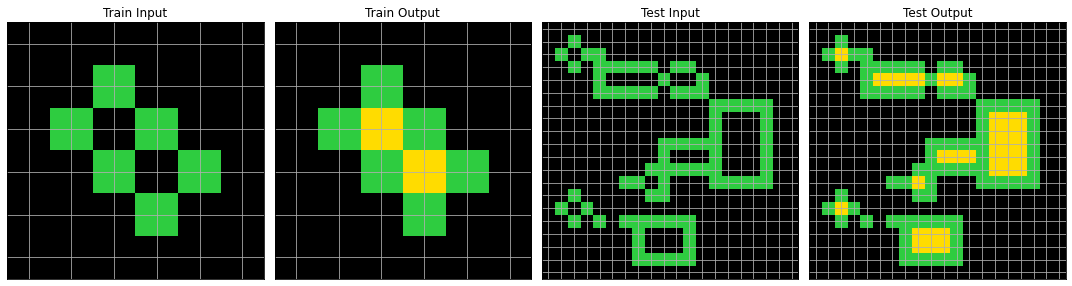

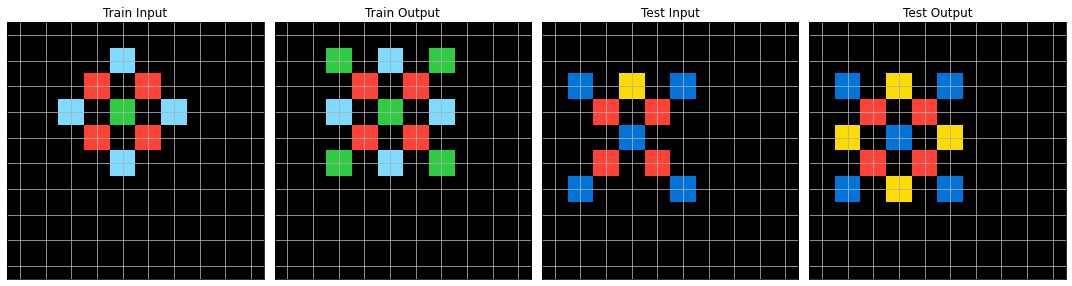

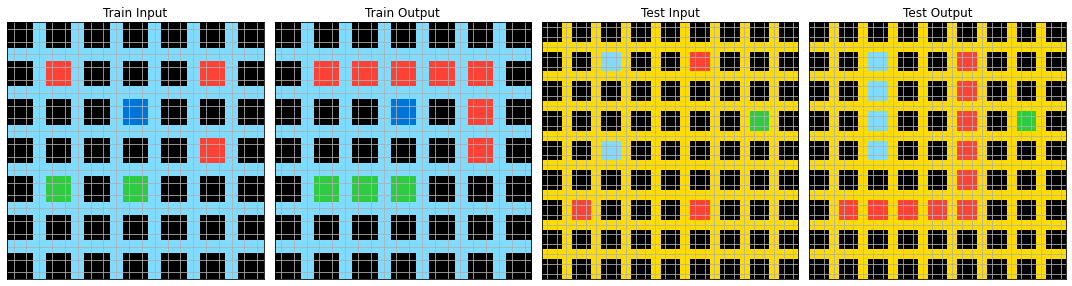

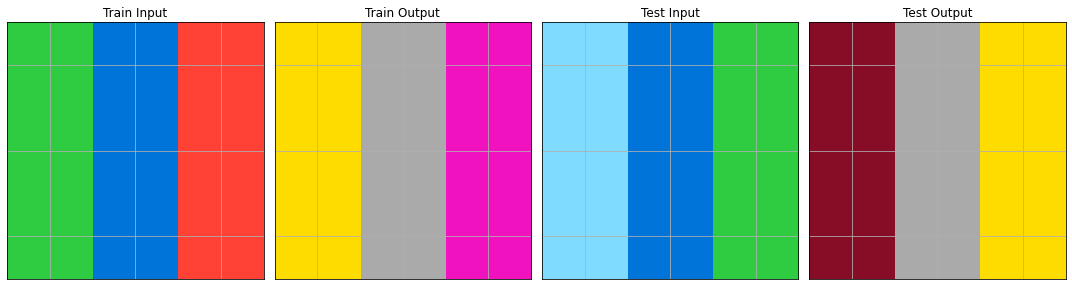

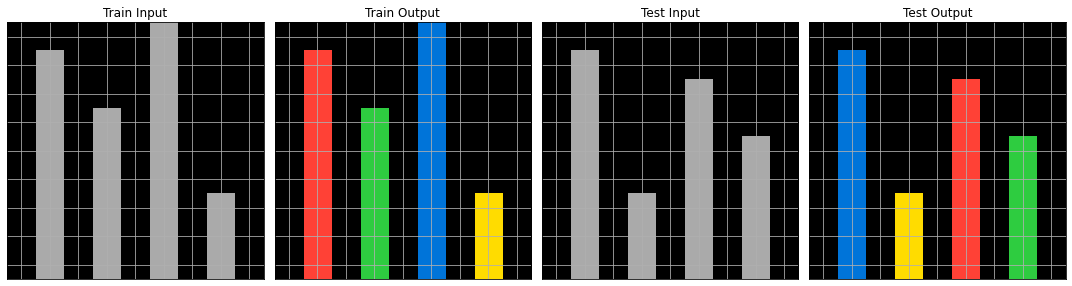

In [43]:
for i in [1, 19, 8, 15, 9]:

    task_file = str(training_path / training_tasks_files[i])

    with open(task_file, 'r') as f:
        task = json.load(f)

    def plot_task(task):
        """
        Plots the first train and test pairs of a specified task,
        using same color scheme as the ARC app
        """
        cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        norm = colors.Normalize(vmin=0, vmax=9)
        fig, ax = plt.subplots(1, 4, figsize=(15,15))
        ax[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['input'])[1]
        height = np.shape(task['train'][0]['input'])[0]
        ax[0].set_xticks(np.arange(0,width))
        ax[0].set_yticks(np.arange(0,height))
        ax[0].set_xticklabels([])
        ax[0].set_yticklabels([])
        ax[0].tick_params(length=0)
        ax[0].grid(True)
        ax[0].set_title('Train Input')
        ax[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['output'])[1]
        height = np.shape(task['train'][0]['output'])[0]
        ax[1].set_xticks(np.arange(0,width))
        ax[1].set_yticks(np.arange(0,height))
        ax[1].set_xticklabels([])
        ax[1].set_yticklabels([])
        ax[1].tick_params(length=0)
        ax[1].grid(True)
        ax[1].set_title('Train Output')
        ax[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['input'])[1]
        height = np.shape(task['test'][0]['input'])[0]
        ax[2].set_xticks(np.arange(0,width))
        ax[2].set_yticks(np.arange(0,height))
        ax[2].set_xticklabels([])
        ax[2].set_yticklabels([])
        ax[2].tick_params(length=0)
        ax[2].grid(True)
        ax[2].set_title('Test Input')
        ax[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['output'])[1]
        height = np.shape(task['test'][0]['output'])[0]
        ax[3].set_xticks(np.arange(0,width))
        ax[3].set_yticks(np.arange(0,height))
        ax[3].set_xticklabels([])
        ax[3].set_yticklabels([])
        ax[3].tick_params(length=0)
        ax[3].grid(True)
        ax[3].set_title('Test Output')
        plt.tight_layout()
        plt.show()

    plot_task(task)

 
 ---
 ---

### 1. Create Train - Test - Split

In [11]:
Xs_test, ys_test, Xs_train, ys_train = [], [], [], []

for task in training_tasks:
    X_test, y_test, X_train, y_train = [], [], [], []

    for pair in task["test"]:
        X_test.append(pair["input"])
        y_test.append(pair["output"])      ### to be predicted !!!

    for pair in task["train"]:
        X_train.append(pair["input"])
        y_train.append(pair["output"])
    
    Xs_test.append(X_test)
    ys_test.append(y_test)
    Xs_train.append(X_train)
    ys_train.append(y_train)

In [12]:
len(Xs_train), len(ys_train), len(Xs_test), len(ys_test)

(400, 400, 400, 400)

---
---

In [46]:
len(Xs_train[0])

5

In [47]:
np.array(Xs_train[0][0])

array([[0, 7, 7],
       [7, 7, 7],
       [0, 7, 7]])

In [48]:
Xs_train[0][0]

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

In [49]:
li = []
for xtrain in Xs_train:
    for inp in xtrain:
        two_dim_array = np.array(inp)
        li.append(two_dim_array)
    x = np.array(li)

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [50]:
x.shape

(1301,)

In [51]:
len(Xs_train[0][0])

3

In [52]:
Xs_train[200][0][0][0]

0

In [53]:
np.array(Xs_train[0][0]).shape

(3, 3)

In [54]:
#new_array=
np.array([[np.array(inp) for inp in task] for task in Xs_train]).shape#, ndmin=2)

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(400,)

In [55]:
xx = np.array([np.array(xi) for xi in Xs_train])


/opt/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [56]:
xx

array([array([[[0, 7, 7],
        [7, 7, 7],
        [0, 7, 7]],

       [[4, 0, 4],
        [0, 0, 0],
        [0, 4, 0]],

       [[0, 0, 0],
        [0, 0, 2],
        [2, 0, 2]],

       [[6, 6, 0],
        [6, 0, 0],
        [0, 6, 6]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 2, 2]]]),
       array([list([[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 0, 3, 0, 0], [0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0, 3, 3, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0,

In [57]:
xx.shape

(400,)

In [58]:
xx[0].shape

(5, 3, 3)

In [59]:
xx[0][0]#.shape

array([[0, 7, 7],
       [7, 7, 7],
       [0, 7, 7]])

In [60]:
xx[1].shape

(5,)

In [61]:
Xs_train

[[[[0, 7, 7], [7, 7, 7], [0, 7, 7]],
  [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
  [[0, 0, 0], [0, 0, 2], [2, 0, 2]],
  [[6, 6, 0], [6, 0, 0], [0, 6, 6]],
  [[2, 2, 2], [0, 0, 0], [0, 2, 2]]],
 [[[0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0],
   [0, 3, 0, 3, 0, 0],
   [0, 0, 3, 0, 3, 0],
   [0, 0, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0]],
  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
   [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
   [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
  [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
   [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
   [0, 3, 3, 0, 3, 3, 0, 3, 0, 0],
   [3, 0, 0, 3, 0, 0, 3, 0, 3, 0],
   [0, 0, 0, 3, 0, 0, 3, 3, 0, 0],
   [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 0, 3, 3, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
   [0, 0,

very basic model from week 9
- instead of assigning to m --> make a fct 
- input_shape needs to be dependent on each task shape --> np.array(Xs_train[0][0]).shape
- kernel_size ???
- put into a loop for task in Xs_train

In [113]:
def basic_model(input_shape, output_shape, kernel):
    m = Sequential([
        Conv2D(16, 
               kernel_size = kernel, 
               padding = 'same', 
               activation = 'relu',
               input_shape = input_shape),         ### let's see if we need a 3rd dimension
        MaxPooling2D(pool_size = (3, 3),
                     strides = (2, 2),
                     padding = "same"),
        Conv2D(32,
               kernel_size = kernel,
               padding='same',
               activation='relu'),
        MaxPooling2D(pool_size=(3, 3),
                     strides=(2, 2),
                     padding="same"),
        Conv2D(64,
               kernel_size = kernel,
               padding='same',
               activation='relu'),
        MaxPooling2D(pool_size=(3, 3),
                     strides=(2, 2),
                     padding="same"),
        Dropout(0.2),
        Flatten(),
        Dense(128,
              activation='relu'),
        Dense(output_shape,
              activation='softmax')
    ])
    return m

`You would usually want to set the number of epochs as low as possible, but the mini-batch-size as high as possible.`

In [141]:
K.clear_session()   #clean slate

idx = 0
#start = time.time()

for X_train, y_train in zip(Xs_train, ys_train):    
    print("TASK " + str(idx + 1))
    
    X_train = np.array([np.array(xi) for xi in X_train], dtype=object)
    X_train = X_train.reshape(X_train.shape[0],X_train[0].shape[0],X_train[0].shape[2], 1)
    input_shape = X_train.shape[1:]
    
    y_train = np.array(y_train)
    y_train = y_train.reshape(y_train.shape[0],-1)     
    output_shape = y_train.shape[1]
#     y_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64) 
    
    X_train = np.asarray(X_train).astype(np.int)

    y_train = np.asarray(y_train).astype(np.int)
    
    if input_shape[0] < 6 or input_shape[1] < 6:
            kernel = 1
    else: kernel = 2
    
    
    
    
    m = basic_model(input_shape, output_shape, kernel)
    
    m.compile(optimizer='adam', 
              loss='mean_squared_error', #### this one needs to be adjusted
              metrics=['accuracy'])  

    callback = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5)

    hist4 = m.fit(X_train,
                  y_tensor,
                  epochs=10,               ### this can be much smaller cause each task has only 5 or so inputs???
                  batch_size=200,          ### this can be much smaller cause each task has only 5 or so inputs???
                  validation_split=0.2) 
    
    
    idx += 1
#    print("Total time: " + str(np.round(end - start, 1)) + " s" + "\n")
    
    
    
#
# epochs: how many times the whole dataset has passed through the model

TASK 1
Epoch 1/10
1/1 [==============================] - 1s 724ms/step - loss: 10.7029 - accuracy: 0.0000e+00 - val_loss: 1.2198 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 10.7020 - accuracy: 0.0000e+00 - val_loss: 1.2197 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 10.7011 - accuracy: 0.0000e+00 - val_loss: 1.2197 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 10.7005 - accuracy: 0.0000e+00 - val_loss: 1.2196 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 10.6998 - accuracy: 0.0000e+00 - val_loss: 1.2196 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 28ms/step - loss: 10.6995 - accuracy: 0.0000e+00 - val_loss: 1.2195 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 10.6977 - accuracy: 0.0000e+00 - 

IndexError: tuple index out of range

In [143]:
xx = np.array([np.array(xi) for xi in Xs_train[1]], dtype=object)

In [144]:
xx

array([array([[0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 3, 0, 3, 0, 0],
       [0, 0, 3, 0, 3, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0]]),
       array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
       [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
       [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       array([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 3, 3, 0, 3, 3, 0, 3, 0, 0],
       [3, 0, 0, 3, 0, 0, 3, 0, 3, 0],
       [0, 0, 0, 3, 0, 0, 3, 3, 0, 0],
       [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       array([[0, 0, 0, 0, 0, 0

In [146]:
xx.shape[0]#,X_train.shape[1],X_train.shape[2], 1)


5

In [147]:
#xx.shape[0], 
xx[0].shape#[1],X_train.shape[2], 1)

(6, 6)

In [124]:
Xs_train[1]#[0]

[[[0, 0, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 0],
  [0, 3, 0, 3, 0, 0],
  [0, 0, 3, 0, 3, 0],
  [0, 0, 0, 3, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
  [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
  [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
  [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
  [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
  [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
  [0, 3, 3, 0, 3, 3, 0, 3, 0, 0],
  [3, 0, 0, 3, 0, 0, 3, 0, 3, 0],
  [0, 0, 0, 3, 0, 0, 3, 3, 0, 0],
  [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 0, 3, 3, 0, 3, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 3, 3, 3, 3, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 3, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 3, 0, 3, 0, 0],
  [0, 0, 3, 3, 3, 3, 3, 3, 3, 0],
  [0, 0, 0, 3, 

In [133]:
np.array([np.array(xi) for xi in Xs_train[1]], dtype=object)

array([array([[0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 3, 0, 3, 0, 0],
       [0, 0, 3, 0, 3, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0]]),
       array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
       [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
       [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       array([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 3, 3, 0, 3, 3, 0, 3, 0, 0],
       [3, 0, 0, 3, 0, 0, 3, 0, 3, 0],
       [0, 0, 0, 3, 0, 0, 3, 3, 0, 0],
       [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       array([[0, 0, 0, 0, 0, 0

In [118]:
np.array(Xs_train[1])

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([list([[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 0, 3, 0, 0], [0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0, 3, 3, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 

In [132]:
np.array(Xs_train[1],dtype=object, ndmin=1)

array([list([[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 0, 3, 0, 0], [0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0, 3, 3, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
       list([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 

In [134]:
np.array([np.array(xi) for xi in Xs_train[0]], dtype=object)

array([[[0, 7, 7],
        [7, 7, 7],
        [0, 7, 7]],

       [[4, 0, 4],
        [0, 0, 0],
        [0, 4, 0]],

       [[0, 0, 0],
        [0, 0, 2],
        [2, 0, 2]],

       [[6, 6, 0],
        [6, 0, 0],
        [0, 6, 6]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 2, 2]]], dtype=object)

In [119]:
Xs_train[0]

[[[0, 7, 7], [7, 7, 7], [0, 7, 7]],
 [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
 [[0, 0, 0], [0, 0, 2], [2, 0, 2]],
 [[6, 6, 0], [6, 0, 0], [0, 6, 6]],
 [[2, 2, 2], [0, 0, 0], [0, 2, 2]]]

In [123]:
np.array(Xs_train[0])

array([[[0, 7, 7],
        [7, 7, 7],
        [0, 7, 7]],

       [[4, 0, 4],
        [0, 0, 0],
        [0, 4, 0]],

       [[0, 0, 0],
        [0, 0, 2],
        [2, 0, 2]],

       [[6, 6, 0],
        [6, 0, 0],
        [0, 6, 6]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 2, 2]]])

In [89]:
X_train = Xs_train[0]

In [90]:
X_train

[[[0, 7, 7], [7, 7, 7], [0, 7, 7]],
 [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
 [[0, 0, 0], [0, 0, 2], [2, 0, 2]],
 [[6, 6, 0], [6, 0, 0], [0, 6, 6]],
 [[2, 2, 2], [0, 0, 0], [0, 2, 2]]]

In [93]:
X_train = np.array(X_train)

In [94]:
X_train

array([[[0, 7, 7],
        [7, 7, 7],
        [0, 7, 7]],

       [[4, 0, 4],
        [0, 0, 0],
        [0, 4, 0]],

       [[0, 0, 0],
        [0, 0, 2],
        [2, 0, 2]],

       [[6, 6, 0],
        [6, 0, 0],
        [0, 6, 6]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 2, 2]]])

In [95]:
X_train.shape

(5, 3, 3)

In [96]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)

In [97]:
X_train

array([[[[0],
         [7],
         [7]],

        [[7],
         [7],
         [7]],

        [[0],
         [7],
         [7]]],


       [[[4],
         [0],
         [4]],

        [[0],
         [0],
         [0]],

        [[0],
         [4],
         [0]]],


       [[[0],
         [0],
         [0]],

        [[0],
         [0],
         [2]],

        [[2],
         [0],
         [2]]],


       [[[6],
         [6],
         [0]],

        [[6],
         [0],
         [0]],

        [[0],
         [6],
         [6]]],


       [[[2],
         [2],
         [2]],

        [[0],
         [0],
         [0]],

        [[0],
         [2],
         [2]]]])

In [99]:
dd = np.array(Xs_train[0])

In [100]:
dd

array([[[0, 7, 7],
        [7, 7, 7],
        [0, 7, 7]],

       [[4, 0, 4],
        [0, 0, 0],
        [0, 4, 0]],

       [[0, 0, 0],
        [0, 0, 2],
        [2, 0, 2]],

       [[6, 6, 0],
        [6, 0, 0],
        [0, 6, 6]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 2, 2]]])

In [101]:
dd.shape#[:-1]

(5, 3, 3)

In [105]:
dd.reshape(dd.shape[0],dd.shape[1],dd.shape[2],1).shape

(5, 3, 3, 1)

In [106]:
dd = dd.reshape(5,3,3,1)

In [107]:
dd

array([[[[0],
         [7],
         [7]],

        [[7],
         [7],
         [7]],

        [[0],
         [7],
         [7]]],


       [[[4],
         [0],
         [4]],

        [[0],
         [0],
         [0]],

        [[0],
         [4],
         [0]]],


       [[[0],
         [0],
         [0]],

        [[0],
         [0],
         [2]],

        [[2],
         [0],
         [2]]],


       [[[6],
         [6],
         [0]],

        [[6],
         [0],
         [0]],

        [[0],
         [6],
         [6]]],


       [[[2],
         [2],
         [2]],

        [[0],
         [0],
         [0]],

        [[0],
         [2],
         [2]]]])

In [67]:
ff = np.array(ys_train[0])

In [68]:
ff.shape

(5, 9, 9)

In [69]:
gg = ff.reshape(5,-1)

In [70]:
gg.shape

(5, 81)

In [71]:
K.clear_session()
m = Sequential([Conv2D(16, kernel_size = 1, padding = 'same', activation = 'relu', input_shape = dd.shape[1:]),
                MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "same"),
                Conv2D(32, kernel_size = kernel, padding='same', activation='relu'),
                MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"),
                Conv2D(64, kernel_size = kernel, padding='same', activation='relu'),
                MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same"),
                Dropout(0.2),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(9*9,activation='softmax')
    ])

In [72]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 16)          32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0

In [77]:
m.compile(optimizer='adam', 
          loss='mean_squared_error', #### this one needs to be adjusted
          metrics=['accuracy'])  

callback = keras.callbacks.EarlyStopping(monitor='accuracy',patience=5)

hist = m.fit(dd,
             gg,
             epochs=100,              ### this can be much smaller cause each task has only 5 or so inputs???
             batch_size=200,          ### this can be much smaller cause each task has only 5 or so inputs???
             validation_split=0.2)
# #             callbacks=[callback])
             

Epoch 1/100
1/1 [==============================] - 1s 644ms/step - loss: 10.6494 - accuracy: 0.0000e+00 - val_loss: 1.1924 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 10.6500 - accuracy: 0.0000e+00 - val_loss: 1.1925 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 10.6497 - accuracy: 0.0000e+00 - val_loss: 1.1926 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 10.6477 - accuracy: 0.0000e+00 - val_loss: 1.1925 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 10.6487 - accuracy: 0.0000e+00 - val_loss: 1.1923 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 10.6480 - accuracy: 0.0000e+00 - val_loss: 1.1920 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 10.6476 - accuracy: 0.0000e+00 - 

Epoch 56/100
1/1 [==============================] - 0s 27ms/step - loss: 10.6468 - accuracy: 0.0000e+00 - val_loss: 1.1965 - val_accuracy: 0.0000e+00
Epoch 57/100
1/1 [==============================] - 0s 25ms/step - loss: 10.6471 - accuracy: 0.0000e+00 - val_loss: 1.1972 - val_accuracy: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 27ms/step - loss: 10.6470 - accuracy: 0.0000e+00 - val_loss: 1.1977 - val_accuracy: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 27ms/step - loss: 10.6488 - accuracy: 0.0000e+00 - val_loss: 1.1982 - val_accuracy: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 25ms/step - loss: 10.6469 - accuracy: 0.0000e+00 - val_loss: 1.1987 - val_accuracy: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 25ms/step - loss: 10.6472 - accuracy: 0.0000e+00 - val_loss: 1.1992 - val_accuracy: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 26ms/step - loss: 10.6461 - accuracy: 0.0000e

In [243]:
5*9*9*10

4050


### PARKING LOT
 ---

?????? creating a dataframe out of all the test-values ??????

In [20]:
matrices = []
for X_train in Xs_train:
    for X in X_train:
        matrices.append(X)
        
values = []
for matrix in matrices:
    for row in matrix:
        for value in row:
            values.append(value)
            
df = pd.DataFrame(values)
df.columns = ["values"]

In [21]:
heights = [np.shape(matrix)[0] for matrix in matrices]
widths = [np.shape(matrix)[1] for matrix in matrices]

In [22]:
max(heights), max(widths)

(30, 30)

In [23]:
y_matrices = []
for y_train in ys_train:
    for y in y_train:
        y_matrices.append(y)

In [24]:
y_heights = [np.shape(matrix)[0] for matrix in y_matrices]
y_widths = [np.shape(matrix)[1] for matrix in y_matrices]

In [25]:
max(y_heights), max(y_widths)

(30, 30)

To create a dataset of all files matching a pattern, use
`tf.data.Dataset.list_files`:

```python
dataset = tf.data.Dataset.list_files("/path/*.txt")

In [207]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))

In [208]:
for element in dataset:
    print(element)

tf.Tensor([], shape=(0,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([2 2], shape=(2,), dtype=int64)
tf.Tensor([3 3 3], shape=(3,), dtype=int64)
tf.Tensor([4 4 4 4], shape=(4,), dtype=int64)
tf.Tensor([5 5 5 5 5], shape=(5,), dtype=int64)
tf.Tensor([6 6 6 6 6 6], shape=(6,), dtype=int64)
tf.Tensor([7 7 7 7 7 7 7], shape=(7,), dtype=int64)
tf.Tensor([8 8 8 8 8 8 8 8], shape=(8,), dtype=int64)
tf.Tensor([9 9 9 9 9 9 9 9 9], shape=(9,), dtype=int64)


In [210]:
dataset = dataset.padded_batch(4, padded_shapes=(None,))

In [211]:
for element in dataset:
    print(element)

tf.Tensor(
[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]], shape=(4, 3), dtype=int64)
tf.Tensor(
[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]], shape=(4, 7), dtype=int64)
tf.Tensor(
[[8 8 8 8 8 8 8 8 0]
 [9 9 9 9 9 9 9 9 9]], shape=(2, 9), dtype=int64)


In [196]:
dataset = tf.data.Dataset.from_tensor_slices(Xs_train[1][0])

In [197]:
for element in dataset:
    print(element)

tf.Tensor([0 0 0 0 0 0], shape=(6,), dtype=int32)
tf.Tensor([0 0 3 0 0 0], shape=(6,), dtype=int32)
tf.Tensor([0 3 0 3 0 0], shape=(6,), dtype=int32)
tf.Tensor([0 0 3 0 3 0], shape=(6,), dtype=int32)
tf.Tensor([0 0 0 3 0 0], shape=(6,), dtype=int32)
tf.Tensor([0 0 0 0 0 0], shape=(6,), dtype=int32)


In [198]:
dataset = dataset.padded_batch(6, padded_shapes=(20,20))

ValueError: The padded shape (20, 20) is not compatible with the corresponding input component shape (6,).

In [ ]:
tf.fill()

In [174]:
Xs_train[1]

[[[0, 0, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 0],
  [0, 3, 0, 3, 0, 0],
  [0, 0, 3, 0, 3, 0],
  [0, 0, 0, 3, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
  [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
  [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
  [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
  [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
  [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
  [0, 3, 3, 0, 3, 3, 0, 3, 0, 0],
  [3, 0, 0, 3, 0, 0, 3, 0, 3, 0],
  [0, 0, 0, 3, 0, 0, 3, 3, 0, 0],
  [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 0, 3, 3, 0, 3, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 3, 3, 3, 3, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 3, 0, 0, 0, 0],
  [0, 0, 3, 0, 0, 3, 0, 3, 0, 0],
  [0, 0, 3, 3, 3, 3, 3, 3, 3, 0],
  [0, 0, 0, 3, 

In [171]:
len(Xs_train[1])

5

In [172]:
len(Xs_train[1][0]),len(Xs_train[1][1]),len(Xs_train[1][2]),len(Xs_train[1][3]),len(Xs_train[1][4])

(6, 10, 10, 10, 20)

In [173]:
len(Xs_train[1][0][0]),len(Xs_train[1][1][0]),len(Xs_train[1][2][0]),len(Xs_train[1][3][0]),len(Xs_train[1][4][0])

(6, 10, 10, 10, 20)

In [ ]:
for batch in dataset.take(2):
  print(batch.numpy())
  print()